In [42]:
import pandas as pd

In [43]:
hr_df=pd.read_csv("C:/Users/Meenakshi/Desktop/Machine Learning IIMB/data/HR_comma_sep.csv")

In [44]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [45]:
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


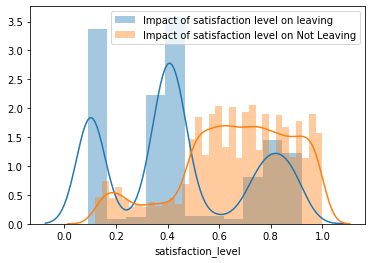

In [46]:
import matplotlib.pyplot as plt
import seaborn as sn
left=hr_df.left
sl_leave =hr_df[left==1]['satisfaction_level']
sl_notleave =hr_df[left==0]['satisfaction_level']

sn.distplot(sl_leave, label= 'Impact of satisfaction level on leaving')
sn.distplot(sl_notleave, label= 'Impact of satisfaction level on Not Leaving');
plt.legend();

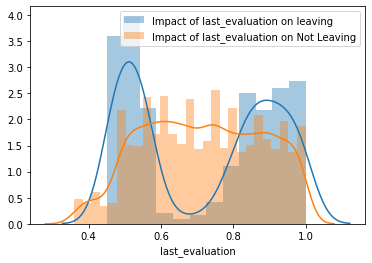

In [47]:
import matplotlib.pyplot as plt
import seaborn as sn
left=hr_df.left
sl_leave =hr_df[left==1]['last_evaluation']
sl_notleave =hr_df[left==0]['last_evaluation']

sn.distplot(sl_leave, label= 'Impact of last_evaluation on leaving')
sn.distplot(sl_notleave, label= 'Impact of last_evaluation on Not Leaving');
plt.legend();

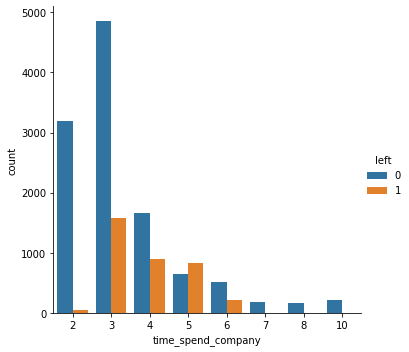

In [48]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.catplot(data=hr_df, 
           x='time_spend_company',
           kind='count', 
           hue='left')


### Encoding Categorical Features(One Hot Encoding)

In [49]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [50]:
hr_encoded_df=pd.get_dummies(hr_df,
                           columns=['sales','salary'],
                            drop_first=True)

In [51]:
hr_encoded_df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14998,0.37,0.52,2,158,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0


### Split Datase into train and test

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_features=list(hr_encoded_df.columns)

In [54]:
X_features.remove('left')

In [55]:
X_train, X_test, \
Y_train, Y_test=train_test_split(hr_encoded_df[X_features],
                                hr_encoded_df.left,
                                train_size=0.8,
                                random_state=100)

In [56]:
X_train.shape

(11999, 18)

In [57]:
X_test.shape

(3000, 18)

### Build a Logistic Regression Model

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg_v1=LogisticRegression()

In [60]:
logreg_v1.fit(X_train, Y_train)

C:\Users\Meenakshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
Y_pred_v1=logreg_v1.predict(X_test)

In [62]:
Y_df_v1=pd.DataFrame({"Actual": Y_test,
                     "Predicted":Y_pred_v1 })

In [63]:
Y_df_v1[0:5]

,Actual,Predicted
10155,0,0
11688,0,0
12598,1,1
12192,1,0
8678,0,1


### Building a Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
cm_v1=confusion_matrix(Y_df_v1.Actual,
                Y_df_v1. Predicted,
                 [1,0])

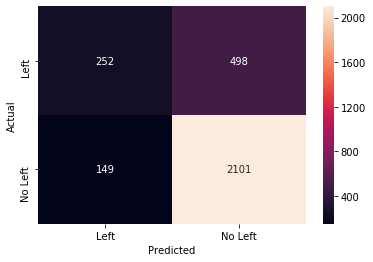

In [66]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm_v1,
          annot=True,
          fmt='0.0f',
          xticklabels=['Left', "No Left"],
          yticklabels=['Left', "No Left"]);
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(Y_df_v1.Actual,
                     Y_df_v1.Predicted))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2250
           1       0.63      0.34      0.44       750

    accuracy                           0.78      3000
   macro avg       0.72      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier


In [70]:
tree_v2=DecisionTreeClassifier(max_depth=5)

In [71]:
tree_v2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
Y_pred_tree=tree_v2.predict(X_test)

In [73]:
Y_df_v1=pd.DataFrame({"Actual": Y_test,
                     "Predicted":Y_pred_tree})

In [74]:
cm_tree=confusion_matrix(Y_test, Y_pred_tree,[1,0])

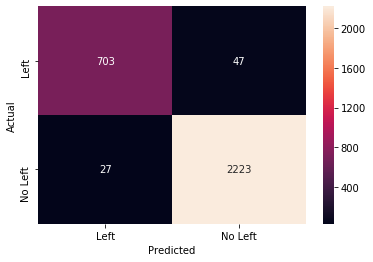

In [75]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm_tree,
          annot=True,
          fmt='0.0f',
          xticklabels=['Left', "No Left"],
          yticklabels=['Left', "No Left"]);
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(Y_df_v1.Actual,
                     Y_df_v1.Predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2250
           1       0.96      0.94      0.95       750

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



### Visualizing the tree

In [78]:
from sklearn.tree import export_graphviz

In [79]:
export_graphviz( tree_v2,
               out_file ='tree.dot',
               feature_names = X_features,
               class_names=['No left', 'Left'],
               filled=True )

In [80]:
import pydotplus as pdot

In [81]:
tree_graph=pdot.graph_from_dot_file("tree.dot")

In [83]:
tree_graph.write_png("tree.png")

True

In [85]:
from IPython import display

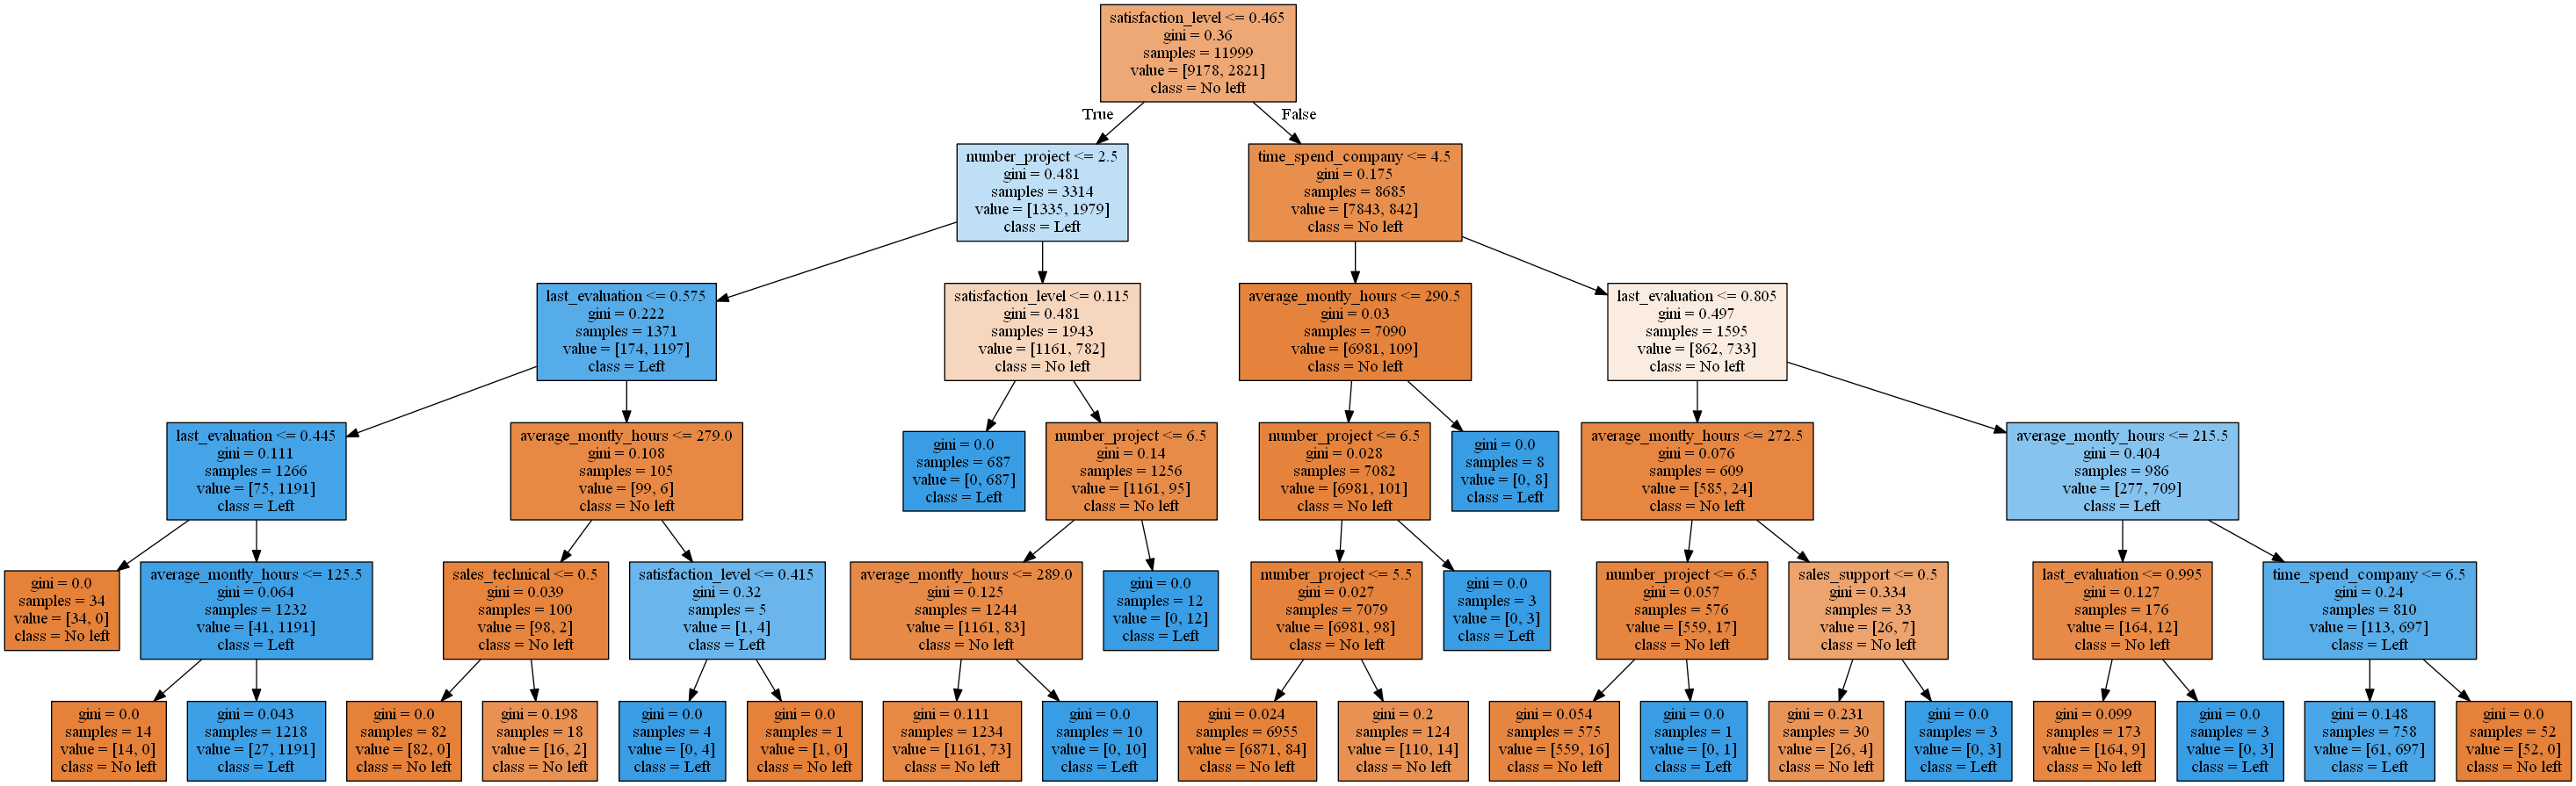

In [87]:
display.Image("tree.png")